In [4]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# create a random dataframe
import string
letters = [random.choice(string.ascii_letters) for i in range(100) ] #string.ascii_letters returns 
# 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
rand = pd.DataFrame(np.random.random((100,5)),columns = list("abcde"))
rand['f'] =np.random.randint(0,10,100)
rand['letters'] = letters
rand['identifier'] = np.random.randint(1,1000,100)

rand

,a,b,c,d,e,f,letters,identifier
0,0.208739,0.322224,0.519729,0.400470,0.374868,3,z,702
1,0.770133,0.134751,0.237837,0.096074,0.459665,1,M,374
2,0.783658,0.275233,0.955751,0.592363,0.718176,6,c,781
3,0.612413,0.737470,0.856309,0.622928,0.129745,0,O,38
4,0.415667,0.505985,0.838937,0.407456,0.980551,2,H,781
...,...,...,...,...,...,...,...,...
95,0.898105,0.848171,0.692300,0.301222,0.365202,6,d,647
96,0.925738,0.737415,0.469987,0.413232,0.752828,1,H,605
97,0.233677,0.482353,0.965756,0.446814,0.863967,2,p,331
98,0.260023,0.950876,0.881456,0.163536,0.003396,0,d,828


In [6]:
rand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a           100 non-null    float64
 1   b           100 non-null    float64
 2   c           100 non-null    float64
 3   d           100 non-null    float64
 4   e           100 non-null    float64
 5   f           100 non-null    int32  
 6   letters     100 non-null    object 
 7   identifier  100 non-null    int32  
dtypes: float64(5), int32(2), object(1)
memory usage: 5.6+ KB


In [7]:
rand["f"].value_counts()

9    15
2    14
3    13
1    13
0    10
7     9
4     9
5     8
6     7
8     2
Name: f, dtype: int64

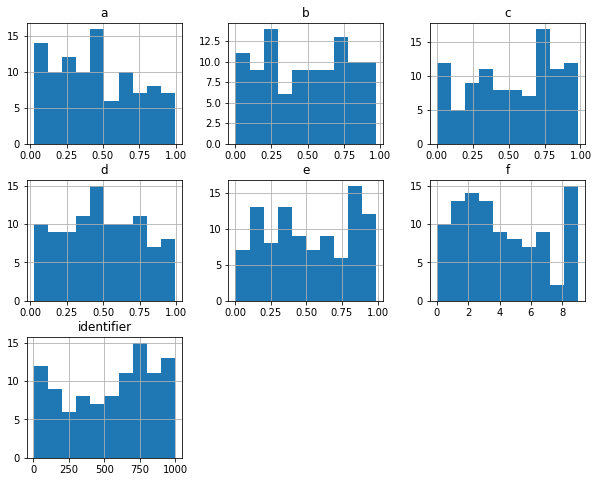

In [8]:
# the following automatically uses the numerical columns only
rand.hist(figsize = (10,8));

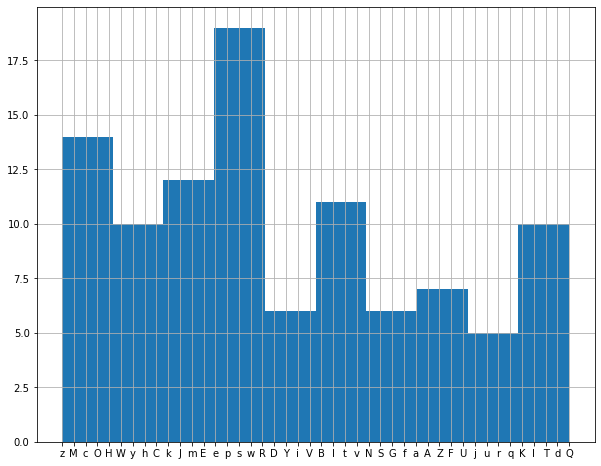

In [9]:
# histogram of a categorical column
rand.letters.hist(figsize = (10,8));

In [10]:
# Create a hash of identifier feature
import hashlib

def testset_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] <256 * test_ratio

# Create a function to use the identifier feature for spliting the dataset

def split_train_test_by_id(data,id_col, test_ratio, hash):
    ids = data[id_col]
    in_testset = ids.apply(lambda id_:testset_check(id_,test_ratio,hash))
    test_set = data.loc[in_testset]
    train_set = data.loc[~in_testset]
    return train_set, test_set


In [11]:
split_train_test_by_id(rand,"identifier",0.2,hashlib.sha256)

(           a         b         c         d         e  f letters  identifier
 0   0.208739  0.322224  0.519729  0.400470  0.374868  3       z         702
 1   0.770133  0.134751  0.237837  0.096074  0.459665  1       M         374
 2   0.783658  0.275233  0.955751  0.592363  0.718176  6       c         781
 3   0.612413  0.737470  0.856309  0.622928  0.129745  0       O          38
 4   0.415667  0.505985  0.838937  0.407456  0.980551  2       H         781
 ..       ...       ...       ...       ...       ... ..     ...         ...
 95  0.898105  0.848171  0.692300  0.301222  0.365202  6       d         647
 96  0.925738  0.737415  0.469987  0.413232  0.752828  1       H         605
 97  0.233677  0.482353  0.965756  0.446814  0.863967  2       p         331
 98  0.260023  0.950876  0.881456  0.163536  0.003396  0       d         828
 99  0.026266  0.201667  0.812765  0.158584  0.539950  1       v         156
 
 [79 rows x 8 columns],
            a         b         c         d       

In [12]:
# Add
rand["hash"]= testset_check(rand["identifier"],0.2,hashlib.sha256)
print(len(rand[rand["hash"] == False]), len(rand[rand["hash"] == True]))

100 0


In [13]:
testset_check(rand["identifier"],0.2,hashlib.sha256)

False

In [14]:
rand["hash"]

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: hash, Length: 100, dtype: bool

In [15]:
#### The problem is that all the hashes are either True or False. SO, the whole point of splitting based 
# on hash is under question now

### Question 12 page 143 
Implement Batch Gradient Descent with early stopping for Softmax Regression
(without using Scikit-Learn)

In [ ]:
y